In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Salary.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [5]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
# To see unique values in the columns
print(df['rank'].unique())
print(df['discipline'].unique())
print(df['sex'].unique())

['Prof' 'AsstProf' 'AssocProf']
['B' 'A']
['Male' 'Female']


In [7]:
print(df['rank'].value_counts())
print(df['discipline'].value_counts())
print(df['sex'].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [9]:
# to convert catagorical data in numders
oe = OrdinalEncoder()

def ordinal_encode(df, column = ['rank','discipline','sex']):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = df.columns
df=ordinal_encode(df, oe_col)
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,18.0,18.0,1.0,289.0
1,2.0,1.0,19.0,16.0,1.0,355.0
2,1.0,1.0,3.0,3.0,1.0,39.0
3,2.0,1.0,44.0,39.0,1.0,209.0
4,2.0,1.0,39.0,41.0,1.0,293.0


In [12]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [13]:
df.shape

(397, 6)

Visualize Data

<Figure size 1440x1440 with 0 Axes>

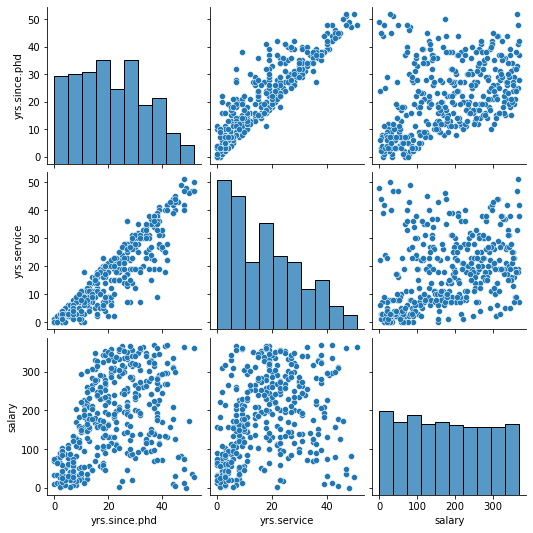

In [14]:
fig = plt.figure(figsize = (20,20))
sns.pairplot(df[['yrs.since.phd', 'yrs.service', 'salary']])

<AxesSubplot:ylabel='count'>

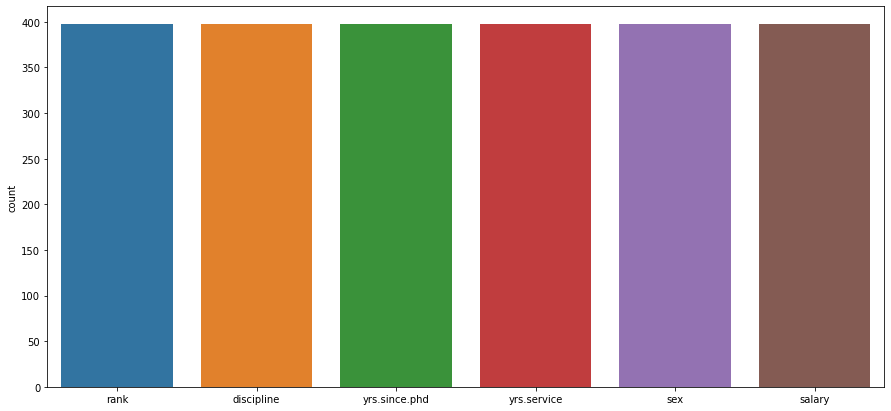

In [15]:
fig = plt.figure(figsize = (15,7))
sns.countplot(data = df)

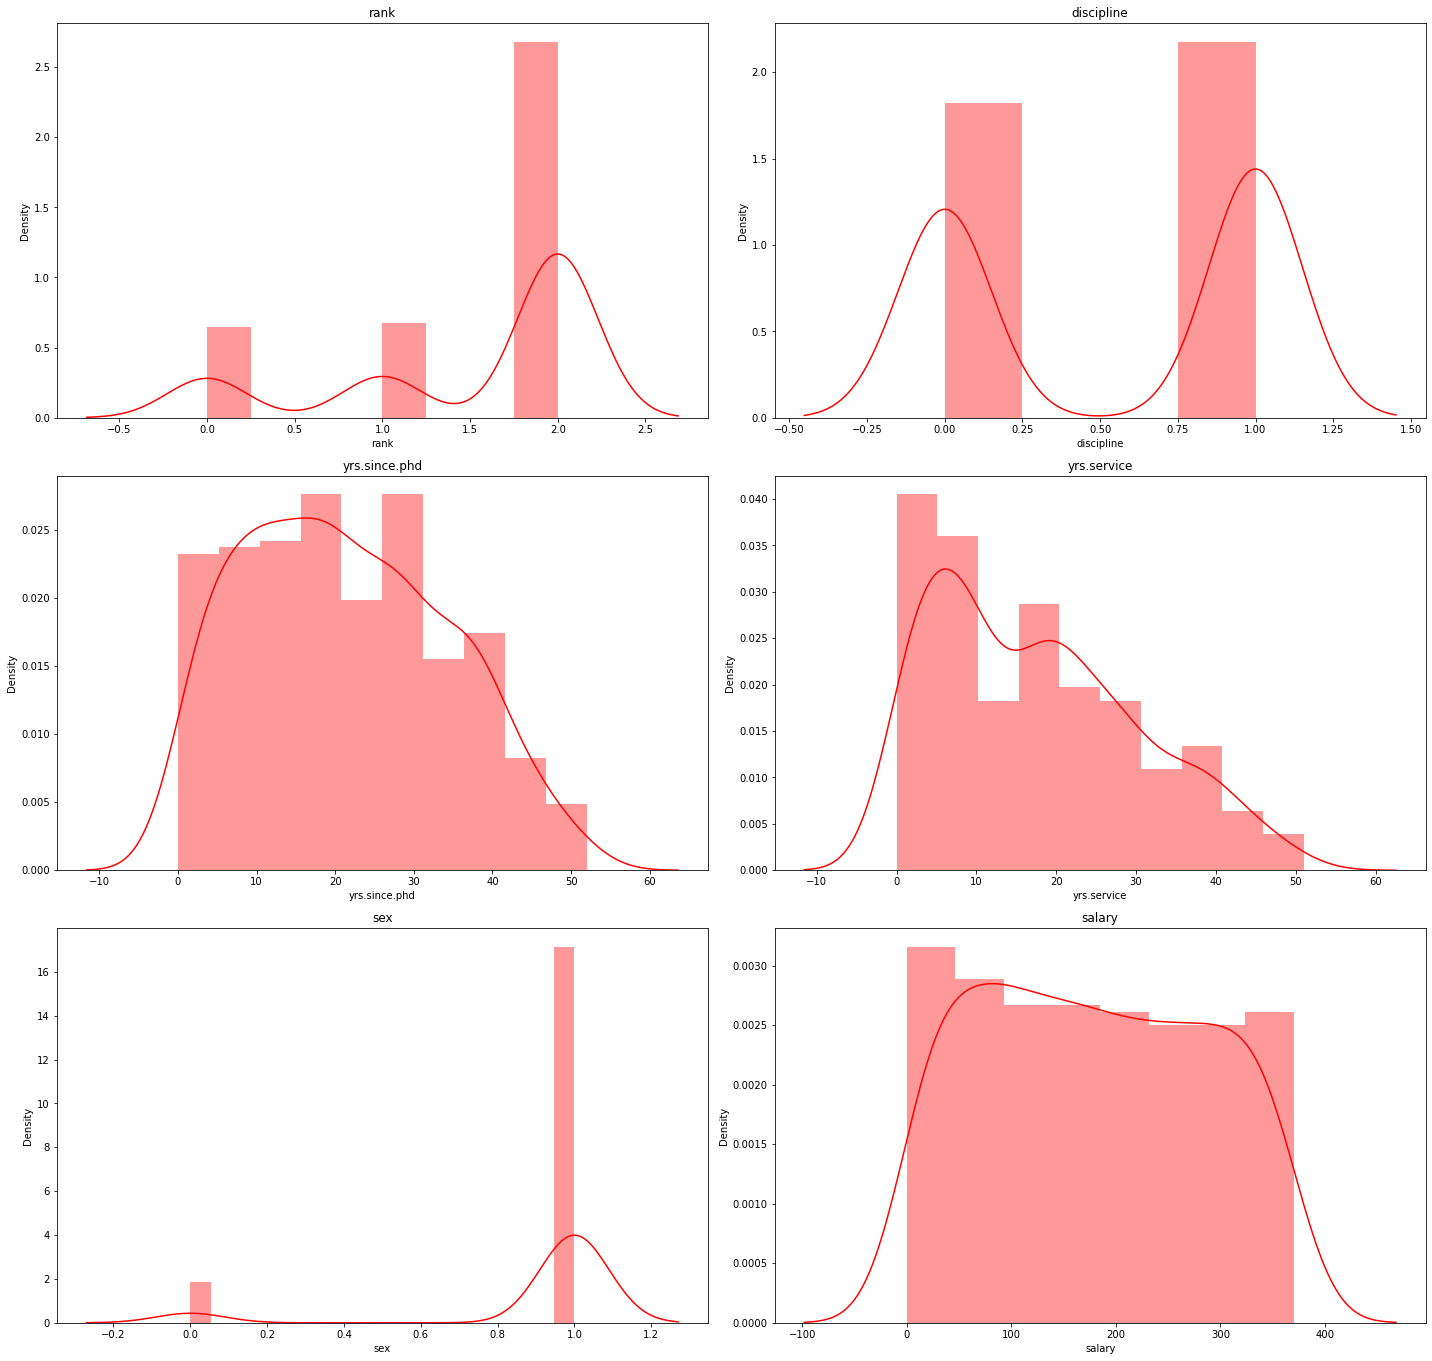

In [18]:
columns = ['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']
plt.figure(figsize = (20,50))
for i in range(len(columns)):
    plt.subplot(8,2, i+1)
    sns.distplot(df[columns[i]],color = 'r');
    plt.title(columns[i])
plt.tight_layout()

In [20]:
corr_matrix = df.corr()
corr_matrix

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.526734,0.454607,0.132492,0.566184
discipline,-0.086266,1.000000,-0.218166,-0.165946,0.003724,0.166957
yrs.since.phd,0.526734,-0.218166,1.000000,0.910380,0.148850,0.430239
yrs.service,0.454607,-0.165946,0.910380,1.000000,0.154191,0.354403
sex,0.132492,0.003724,0.148850,0.154191,1.000000,0.130714
salary,0.566184,0.166957,0.430239,0.354403,0.130714,1.000000


<AxesSubplot:>

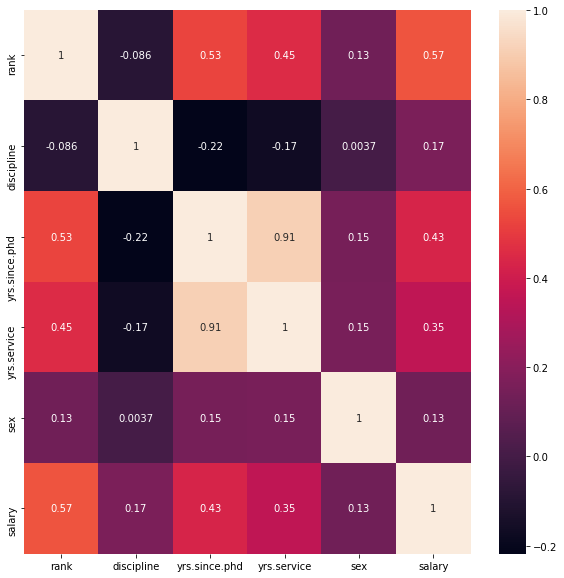

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,annot = True)

In [23]:
# splitting the data into independent and dependent datasets
x = df.drop(['salary'],axis = 1)
y = df['salary']

In [24]:
# testing to accpect null hypothsis or not
normaltest(df.salary.values)

NormaltestResult(statistic=258.5666427553787, pvalue=7.127987403429061e-57)

In [25]:
#spliting dataset into training(70%) and testing(30%)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=45)

In [26]:
xtrain.shape

(277, 5)

In [27]:
ytrain.shape

(277,)

In [30]:
error_df = list()

lr = LinearRegression()
lr = lr.fit(xtrain,ytrain)
ytrain_pred = lr.predict(xtrain)
ytest_pred = lr.predict(xtest)

error_df.append(pd.Series({'train': mean_squared_error(ytrain,ytrain_pred),
                          'test':mean_squared_error(ytest,ytest_pred)},name='ordinal_encode'))


error_df = pd.concat(error_df,axis=1)
error_df

,ordinal_encode
train,6066.828542
test,8763.538084


In [33]:
# scaling the data(feature scaling)
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

Model-Making

In [35]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lrpred = lr.predict(xtest)
r2_score(lrpred,ytest)

-0.5056799309688567

In [36]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
dtrpred = dtr.predict(xtest)
r2_score(dtrpred,ytest)

0.3916405532081295

In [37]:
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)
rfrpred = rfr.predict(xtest)
r2_score(rfrpred,ytest)

0.3524351207620855